<font size=5> Introduction to Computational Science </font>
<br><font size=5> Assignment 1: SIR model (ODE)
<br> 

<br><br><br><font size=4> **Problem 1:** Numerical integration of the basic model </font>
<br><br> <font size=3>**Problem 1.1:** 
<br>Firstly, it builds a basic SIR model without demography by integrating the number of susceptible (S), infected (I), and recovered (R) individuals differential equations. Secondly, it explores which parameters determine if a disease evolve an epimedic by fitting a serious combinations of $\beta$ and $\gamma$ according to well-known infectious disease.
<br>

In [2]:
import numpy as np
import random
import math
import matplotlib
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.integrate import odeint
from scipy.fftpack import fft,fftfreq
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


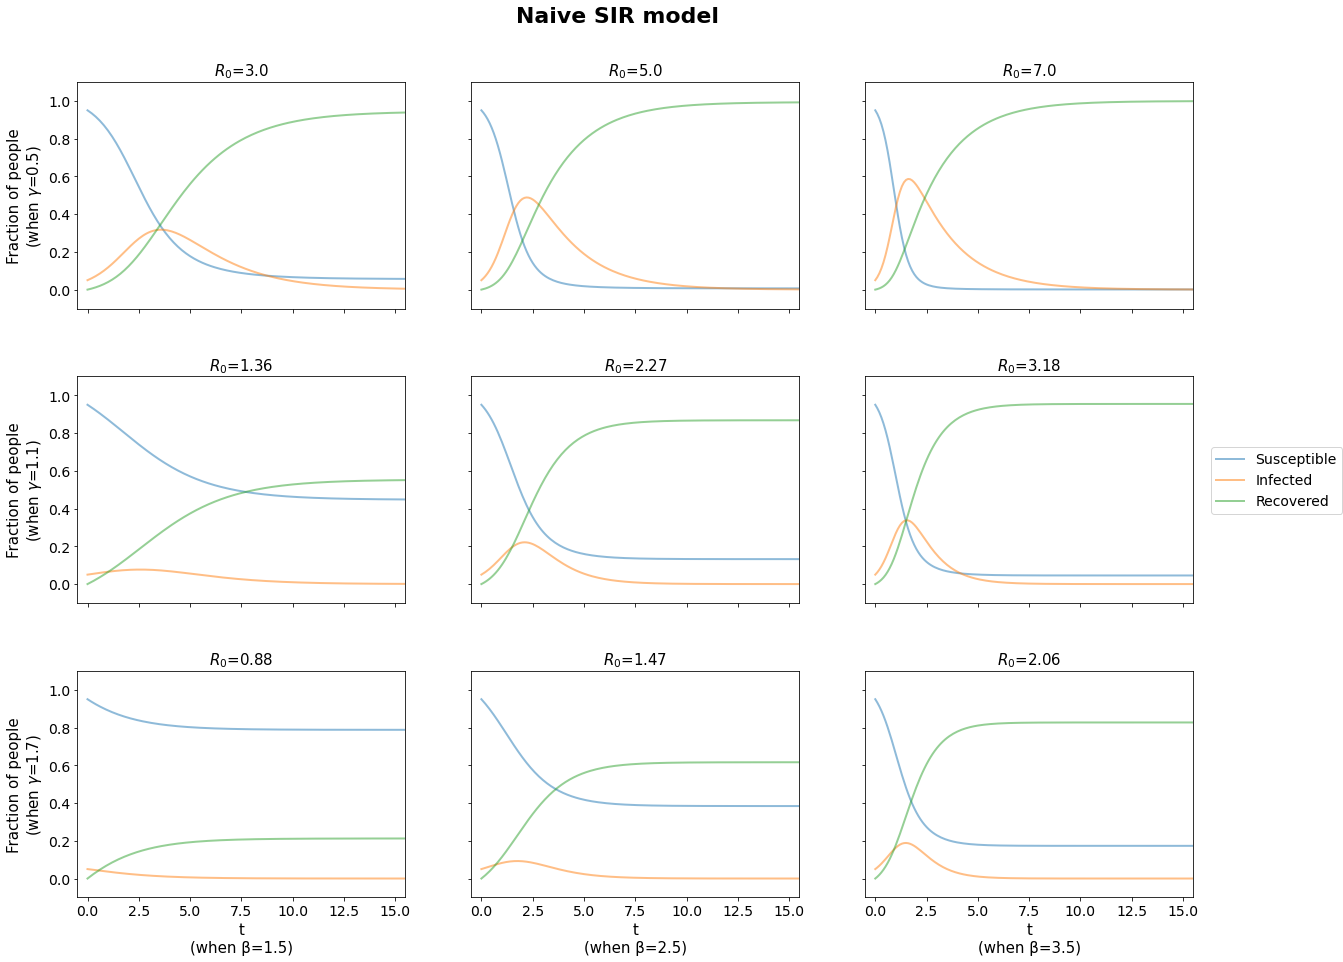

In [4]:
# Build basic SIR model without demograhy
def SIR_basic(y,t,beta,gamma):
    S,I,R=y
    dSdt=-beta*S*I 
    dIdt=beta*S*I-gamma*I
    dRdt=gamma*I
    return [dSdt,dIdt,dRdt]

# Set the initial values
S0=0.95
I0=1-S0
R0_r=1-S0-I0
beta=[1.5,2.5,3.5]
gamma=[0.5,1.1,1.7]
t=np.linspace(0,200,2001)

# Plot all combinations of beta and gamma into the model
fig,ax=plt.subplots(nrows=len(gamma),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(gamma)):
    for j in range(len(beta)):
        result=odeint(SIR_basic,[S0,I0,R0_r],t,args=(beta[j],gamma[i]))
        R0=beta[j]/gamma[i]
        ax[i,j].figsize=(3,3)
        ax[i,j].plot(t,result,alpha=0.5,lw=2) 
        ax[i,j].set_xlim((-0.5,15.5))
        ax[i,j].set_ylim((-0.1,1.1))
        ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=15)
        ax[2,j].set_xlabel('t'+'\n(when '+ chr(946)+'='+str(beta[j])+')',fontsize=15)
        ax[i,0].set_ylabel('Fraction of people'+'\n(when '+ '$\gamma$'+'='+str(gamma[i])+')',fontsize=15)
        ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.3,wspace=0.2)
fig.legend(labels=['Susceptible','Infected','Recovered'],loc="right",borderaxespad=0.07,fontsize=14)
fig.suptitle('Naive SIR model',y=0.95,weight='bold',fontsize=22)
plt.savefig('SIR1.jpg',dpi=150)

<br><br><font size=3> This part explores if $R_0$ can determine an epidemic happening durring a long time. It counts on the total people who has been infected, which is equal to the reoverd people. And compare it with $R_0$.
<br>

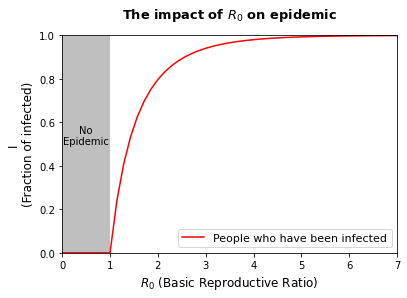

In [5]:
# Evaluate if an epidemic happen

# Create a equation, that the total people who has been infected (R_inf) is the function of R0
def I_R0(R_inf,R0,S0):
    return R_inf+S0*np.e**(-R_inf*R0)-1

# Solve the equation by using the nonlinear least-squares method
def non_lsm(I_R0,R0,S0):
    value=fsolve(I_R0,R0,args=(R0,S0))
    return value

# Set the initial values
R0=np.linspace(0,7,50)
S0=1
result=non_lsm(I_R0,R0,S0)

# Draw the image
plt.title("The impact of $R_0$ on epidemic",y=1.05,weight='bold',fontsize=13)
plt.plot(R0,result,'r',label='People who have been infected')
plt.axvspan(0,1,facecolor='gray',alpha=0.5)
plt.text(0.35,0.55,'No')
plt.text(0.01,0.5,'Epidemic')
plt.xlim(0,7)
plt.ylim(0,1)
plt.xlabel('$R_0$ (Basic Reproductive Ratio)',fontsize=12)
plt.ylabel('I'+'\n(Fraction of infected)',fontsize=12)
plt.legend(fontsize=11)
plt.savefig('SIR_epidemic.jpg',dpi=150)

<br><br><font size=3> To understand the process of epidemic, it applies phase space diagrams with different initial number of susceptible people.
<br>

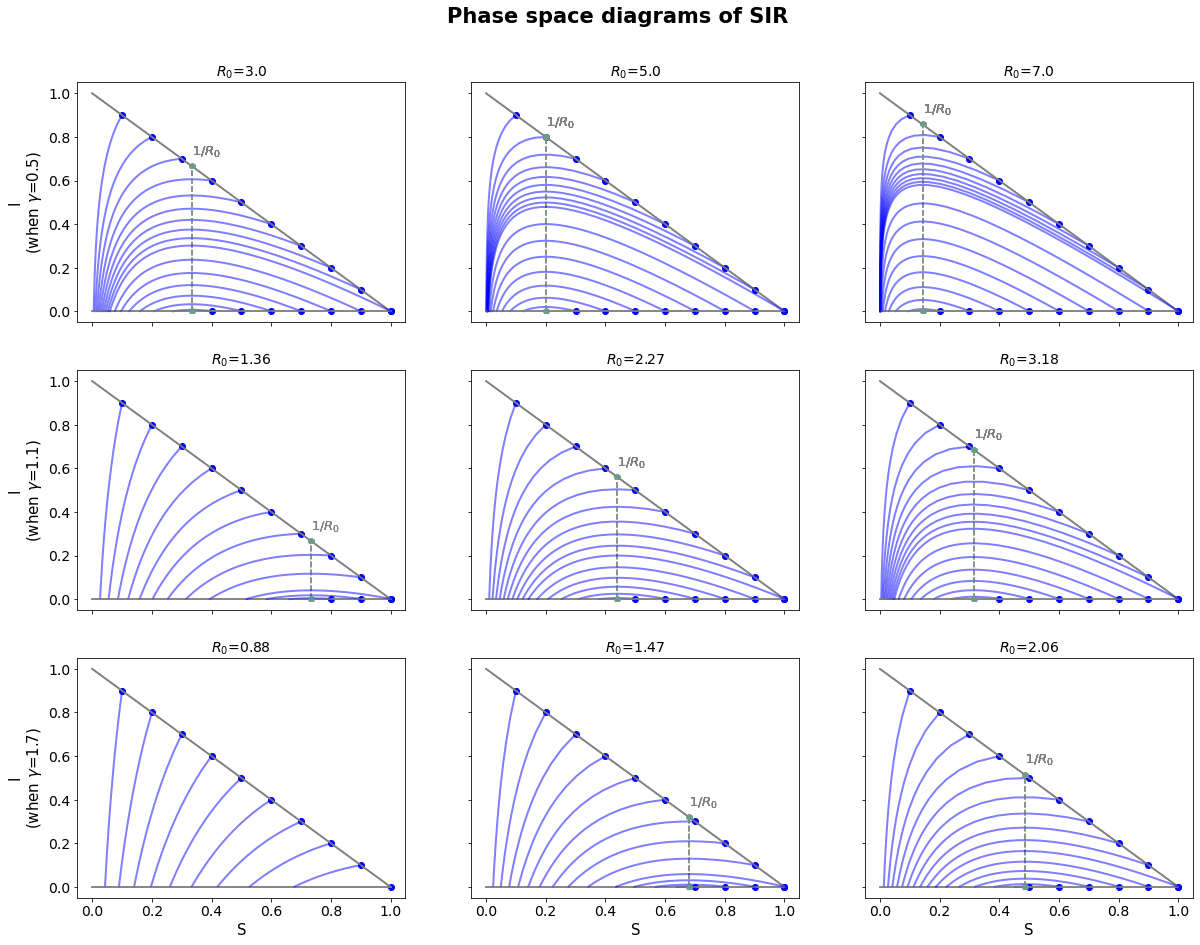

In [6]:
# Provide phase space diagrams

# Set the initial values
S0_list=np.linspace(0.1,1,10)
t=np.linspace(0,200,2001)
beta=[1.5,2.5,3.5]
gamma=[0.5,1.1,1.7] 

# Dots indicate the initial condition. On horizontal line we have I(0) = 0.001, On the diagonal we have R(0) = 0.
fig,ax=plt.subplots(nrows=len(gamma),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(gamma)):
    for j in range(len(beta)):
        
            for k in S0_list:              # Plot the change of I with S0   
                S0=k       
                I0=1-S0
                R0_r=0
                R0=beta[j]/gamma[i]
                result=odeint(SIR_basic,[S0,I0,R0_r],t,args=(beta[j],gamma[i])).T    
                ax[i,j].plot(result[0],result[1],'blue',alpha=0.5,lw=2) 
                ax[i,j].plot(S0,1-S0,'b-')  
                ax[i,j].scatter(S0,1-S0,c='blue')
                ax[i,j].plot([0,1],[1,0],'gray',alpha=0.3)
                ax[i,j].plot([0,1],[0,0],'gray',alpha=0.3)
                ax[i,j].plot([1/R0,1/R0],[0,1-1/R0],'p--',alpha=0.3)
                
                if (S0>1/R0)&(R0>1):       # Plot the change of I with S0, when I0=0.001
                    I0=0.001        
                    R0_r=1-I0-S0
                    result=odeint(SIR_basic,[S0,I0,R0_r],t,args=(beta[j],gamma[i])).T
                    ax[i,j].plot(result[0],result[1],'blue',alpha=0.5,lw=2) 
                    ax[i,j].scatter(S0,I0,c='blue')               
                    ax[i,j].text(1/R0,1.05-1/R0,'1/$R_0$',c='gray',fontsize=13)

            ax[i,j].figsize=(3,3)     
            ax[i,j].set_xlim(-0.05,1.05)
            ax[i,j].set_ylim(-0.05,1.05)
            ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=14)
            ax[2,j].set_xlabel('S',fontsize=15)     
            ax[i,0].set_ylabel('I'+'\n(when '+ '$\gamma$'+'='+str(gamma[i])+')',fontsize=15)
            ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.2,wspace=0.2)
fig.suptitle('Phase space diagrams of SIR',y=0.95,weight='bold',fontsize=21)
plt.savefig('SIR_psd.jpg',dpi=150)

<br><br><font size=3> **Problem 1.2:** </font>
<br><font size=3> Fit the SIR model into historical data from a case of an influenza outbreak. 
<br>

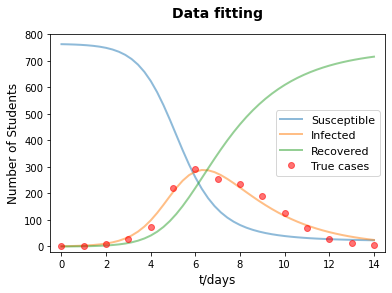

In [7]:
# Set the initial values
N=763
t = np.linspace(0, 14, 15)
case = [1,3,8,28,75,221,291,255,235,190,125,70,28,12,5]
case_r=[i/N for i in case]
I0,R0_r=1/N,0
S0=(N-I0-R0_r)/N

# Define a function to get the integration of equations
def fit(x,beta,gamma):  
    ret=odeint(SIR_basic,[S0,I0,R0_r],t,args=(beta, gamma))    
    S,I,R=ret.T
    return I

# Use polynomial fitting to get the parameters: beta and gamma
factor=curve_fit(fit,t,case_r)
beta,gamma=factor[0][0],factor[0][1]

# Integrate the SIR equations over the time to get S,I,R
t1 = np.linspace(0, 14, 50)
result=odeint(SIR_basic,[S0,I0,R0_r],t1,args=(beta,gamma))

# Draw the image
plt.plot(t1,result*N,alpha=0.5,lw=2) 
plt.plot(t,case,'o',color='r',alpha=0.55,lw=2)
plt.xlabel('t/days',fontsize=12)
plt.ylabel('Number of Students',fontsize=12)
plt.xlim(-0.5,14.5)
plt.ylim(-20,800)
plt.legend(labels=['Susceptible','Infected','Recovered','True cases'],loc="right",fontsize=11)
plt.title("Data fitting",y=1.05,weight='bold',fontsize=14)
plt.savefig('SIR_datafit.jpg',dpi=150)

<br><br><font size=3> **Problem 1.3:** </font>
<br><font size=3> Propose a vaccination plan to prevent this influenza outbreak. It needs calculate the the number of suscepitable who get vacinated as a threshold.
<br>

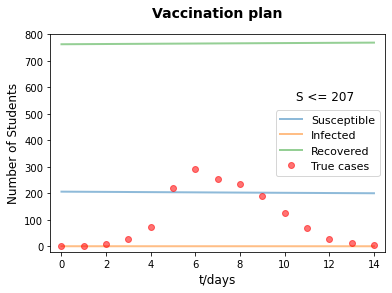

In [8]:
# Set the initial values
N=763
t = np.linspace(0, 14, 15)
case = [1,3,8,28,75,221,291,255,235,190,125,70,28,12,5]
case_r=[i/N for i in case]
beta,gamma=1.66,0.45
R0=beta/gamma
S0=1/R0        # Caculale S0 by letting dI/dt<0, which is equal to S0< 1/R0
I0=1/N
R0_r=(N-S0-I0)/N

# Integrate the SIR equations over the time to get S,I,R
t1 = np.linspace(0, 14, 50)
result=odeint(SIR_basic,[S0,I0,R0_r],t1,args=(beta, gamma))

# Draw the image
plt.plot(t1,result*N,alpha=0.5,lw=2) 
plt.plot(t,case,'o',color='r',alpha=0.55,lw=2)
plt.xlabel('t/days',fontsize=12)
plt.ylabel('Number of Students',fontsize=12)
plt.xlim(-0.5,14.5)
plt.ylim(-20,800)
plt.text(10.5,550,'S <= '+str(round(S0*N)),fontsize=12)
plt.legend(labels=['Susceptible','Infected','Recovered','True cases'],loc="right",fontsize=11)
plt.title("Vaccination plan",y=1.05,weight='bold',fontsize=14)
plt.savefig('SIR_vac.jpg',dpi=150)

<br><br><br><font size=4> **Problem 2:** Demography </font>
<br><br> <font size=3>**Problem 2.1:** 
<br>It needs to add natural birth and death rate factors into the basic SIR model. There should be oscillations in the image. And it also analyses how does the frequency and amplitude influence the oscillations.
<br>

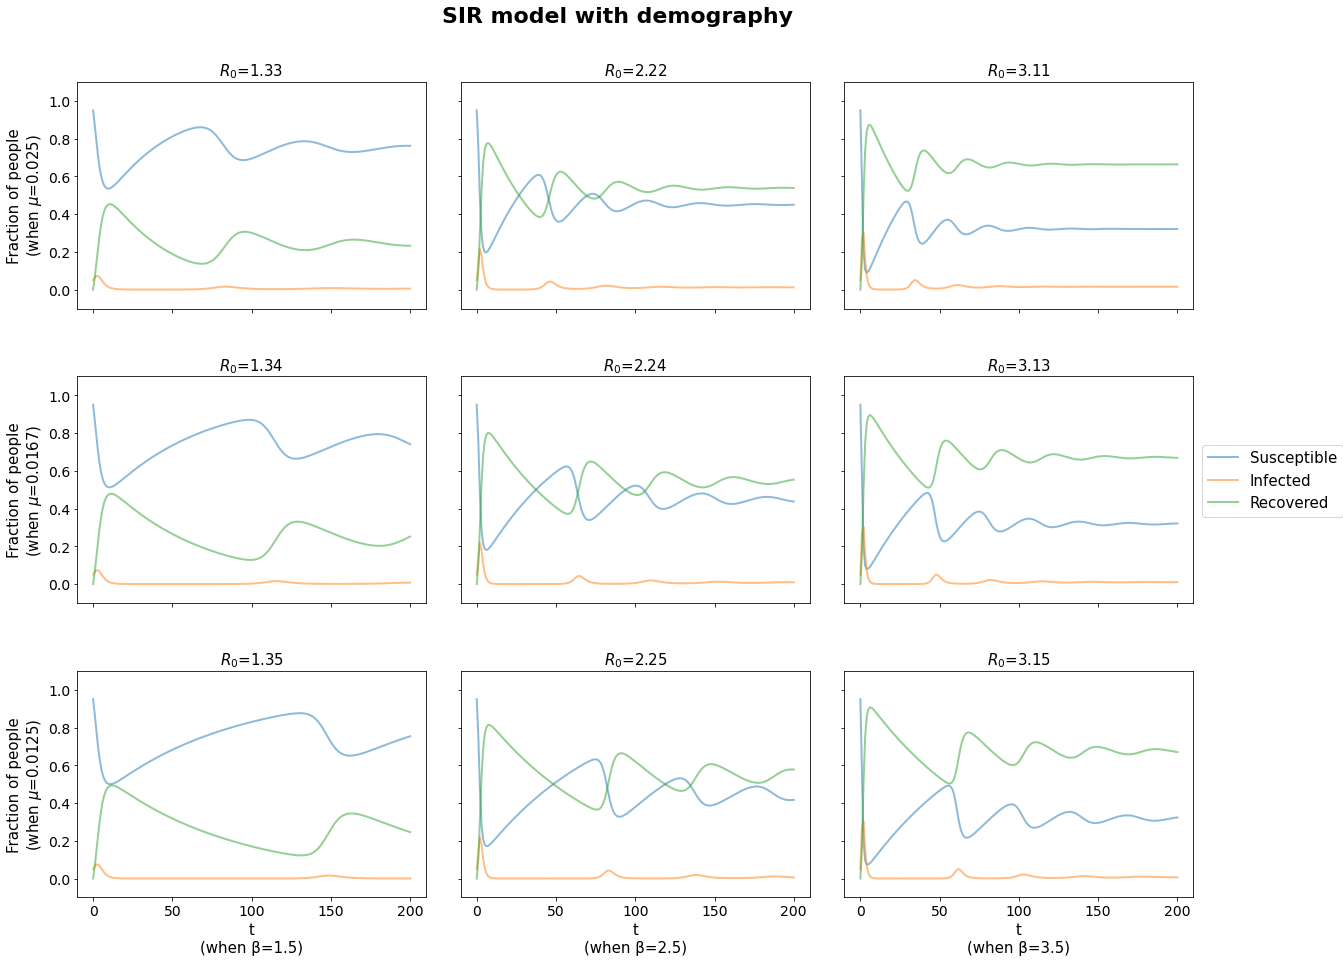

In [9]:
# Build the SIR model with demograhy
def SIR_demography(y,t,beta,gamma,mu):
    S,I,R=y
    dSdt=mu-beta*S*I-mu*S
    dIdt=beta*S*I-mu*I-gamma*I
    dRdt=gamma*I-mu*R
    return [dSdt,dIdt,dRdt]

# Set the initial values
S0=0.95
I0=1-S0
R0_r=1-S0-I0
beta=[1.5,2.5,3.5]
gamma=1.1
mu=[1/40,1/60,1/80]
t=np.linspace(0,200,201)

# Plot all combinations of beta and mu into the model
fig,ax=plt.subplots(nrows=len(mu),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(mu)):
    for j in range(len(beta)):
        result=odeint(SIR_demography,[S0,I0,R0_r],t,args=(beta[j],gamma,mu[i]))
        R0=beta[j]/(gamma+mu[i])
        ax[i,j].figsize=(3,3)
        ax[i,j].plot(t,result,alpha=0.5,lw=2) 
        ax[i,j].set_ylim((-0.1,1.1))
        ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=15)
        ax[2,j].set_xlabel('t'+'\n(when '+ chr(946)+'='+str(beta[j])+')',fontsize=15)
        ax[i,0].set_ylabel('Fraction of people'+'\n(when '+ '$\mu$'+'='+str(round(mu[i],4))+')',fontsize=15)
        ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.3,wspace=0.1)
fig.legend(labels=['Susceptible','Infected','Recovered'],loc="right",borderaxespad=0.05,fontsize=15)
fig.suptitle('SIR model with demography',y=0.95,weight='bold',fontsize=22)
plt.savefig('SIR_d1.jpg',dpi=150)

<br><br> <font size=3>Create phase space diagrams 
<br>

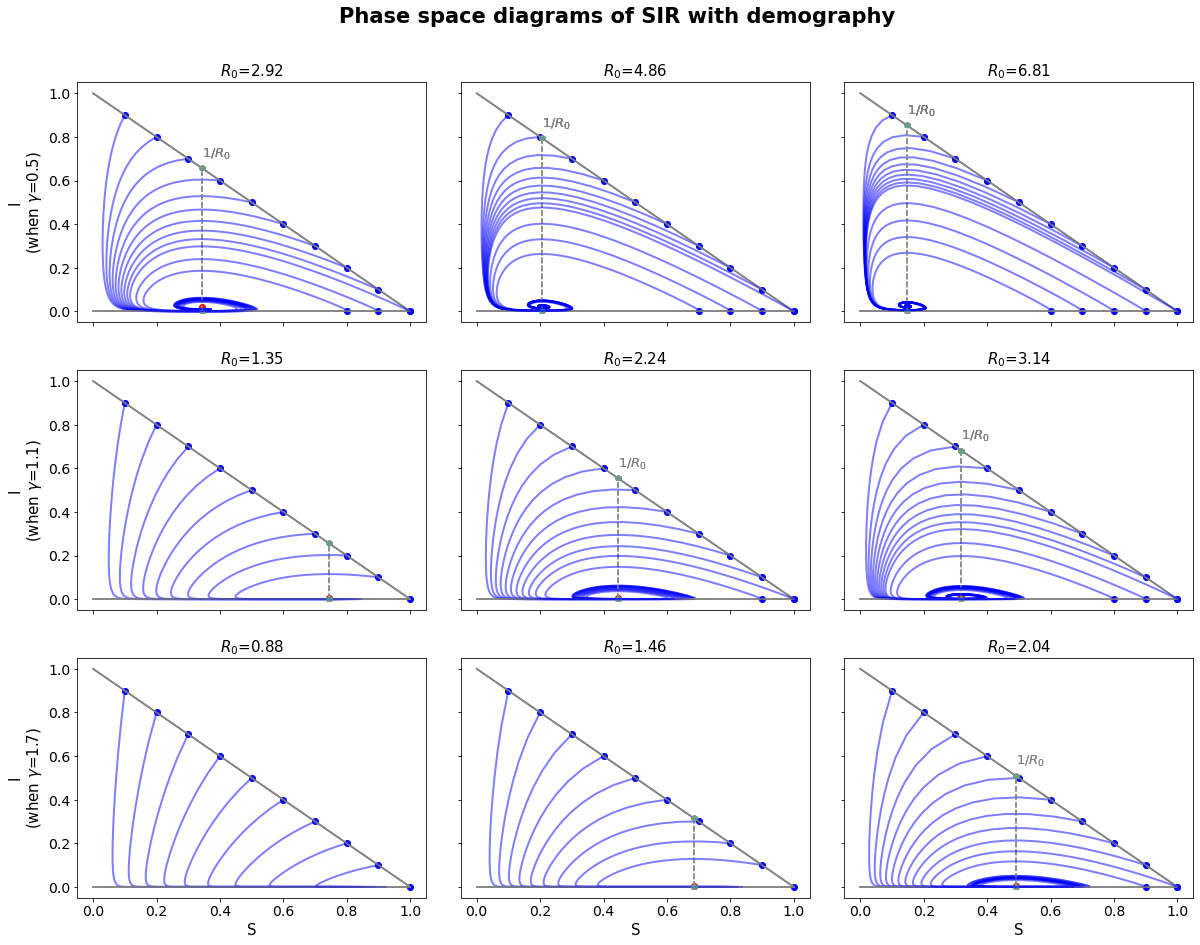

In [10]:
# Set the initial values
S0_list=np.linspace(0.1,1,10)
beta=[1.5,2.5,3.5]
gamma=[0.5,1.1,1.7]
mu=1/70
t=np.linspace(0,100,800)


# Dots indicate the initial condition. On horizontal line we have I(0) = 0.001,
fig,ax=plt.subplots(nrows=len(gamma),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(gamma)):
    for j in range(len(beta)):
        
            for k in S0_list:              # Plot the change of I with S0   
                S0=k       
                I0=1-S0
                R0_r=0
                R0=beta[j]/(gamma[i]+mu)
                S_fix=1/R0                 # Get the fixed point
                I_fix=mu*(R0-1)/beta[j]
                R_fix=1-1/R0-mu*(R0-1)/beta[j]               
                result=odeint(SIR_demography,[S0,I0,R0_r],t,args=(beta[j],gamma[i],mu)).T    
                ax[i,j].plot(result[0],result[1],'blue',alpha=0.5,lw=2) 
                ax[i,j].plot(S0,1-S0,'b-')  
                ax[i,j].scatter(S0,1-S0,c='blue')
                ax[i,j].plot([0,1],[1,0],'gray',alpha=0.3)
                ax[i,j].plot([0,1],[0,0],'gray',alpha=0.3)
                ax[i,j].plot([1/R0,1/R0],[0,1-1/R0],'p--',alpha=0.3)
                
                if (S0>(1/R0+0.4))&(R0>1):       # hot the change of I with S0, when I0=0.001
                    I0=0.001        
                    R0_r=1-I0-S0
                    result=odeint(SIR_demography,[S0,I0,R0_r],t,args=(beta[j],gamma[i],mu)).T
                    ax[i,j].plot(result[0],result[1],'blue',alpha=0.5,lw=2) 
                    ax[i,j].scatter(S0,I0,c='blue')               
                    ax[i,j].text(1/R0,1.05-1/R0,'1/$R_0$',c='gray',fontsize=13)
        
            ax[i,j].figsize=(3,3) 
            ax[i,j].scatter(S_fix,I_fix,c='red', marker='o')
            ax[i,j].set_xlim(-0.05,1.05)
            ax[i,j].set_ylim(-0.05,1.05)
            ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=15)
            ax[2,j].set_xlabel('S',fontsize=15)     
            ax[i,0].set_ylabel('I'+'\n(when '+'$\gamma$'+'='+str(gamma[i])+')',fontsize=15)
            ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.2,wspace=0.1)
fig.suptitle('Phase space diagrams of SIR with demography',y=0.95,weight='bold',fontsize=21)
plt.savefig('SIR_d2.jpg',dpi=150)

<br><br><font size=3> Apply Fourier analysis towards the frequency and amplitude.
<br>

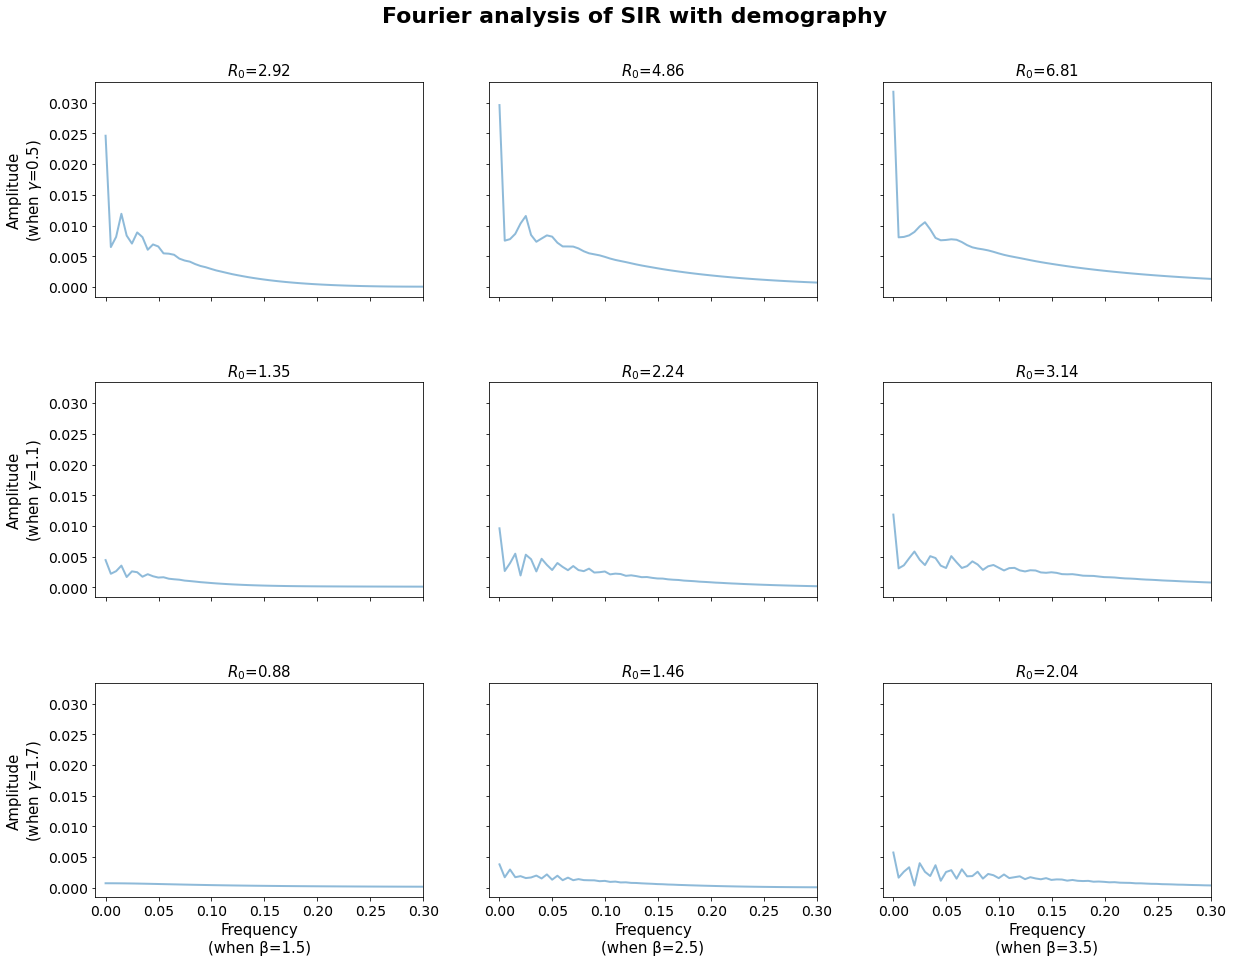

In [11]:
# Set the initial values
S0=0.95
I0=1-S0
R0_r=1-S0-I0
beta=[1.5,2.5,3.5]
gamma=[0.5,1.1,1.7] 
mu=1/70
t=np.linspace(0,200,201)

# Draw the image
fig,ax=plt.subplots(nrows=len(gamma),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(gamma)):
    for j in range(len(beta)):
        # Fourier analysis 
        result=odeint(SIR_demography,[S0,I0,R0_r],t,args=(beta[j],gamma[i],mu))
        R0=beta[j]/(gamma[i]+mu)
        
        N=len(t)                        
        x_fre= fftfreq(len(result[:,1]))   # Get the frequency
        x_half=x_fre[range(int(N/2))]      # Because of symmetry, half the interval
        y_f=fft(result[:,1])               # Fast Fourier transform
        y_abs=np.abs(y_f)                  # Get the absolute value
        y_normalization=y_abs/N            # Normalization processing
        y_normalization_half=y_normalization[range(int(N/2))]   # Half the interval  
        
        ax[i,j].figsize=(3,3)
        ax[i,j].plot(x_half,y_normalization_half,alpha=0.5,lw=2) 
        ax[i,j].set_xlim(-0.01,0.3)
        ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=15)
        ax[2,j].set_xlabel('Frequency'+'\n(when '+ chr(946)+'='+str(beta[j])+')',fontsize=15)
        ax[i,0].set_ylabel('Amplitude'+'\n(when '+ '$\gamma$'+'='+str(round(gamma[i],4))+')',fontsize=15)
        ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.4,wspace=0.2)
fig.suptitle('Fourier analysis of SIR with demography',y=0.95,weight='bold',fontsize=22)
plt.savefig('SIR_d3.jpg',dpi=150)

<br><br> <font size=3>**Problem 2.2:** 
<br>It adds an infection induced mortality factor into the SIR model without demography. (And use phase space diagrams to analyse). Also, it explores the outcome, when the mortality approaches 1.
<br>

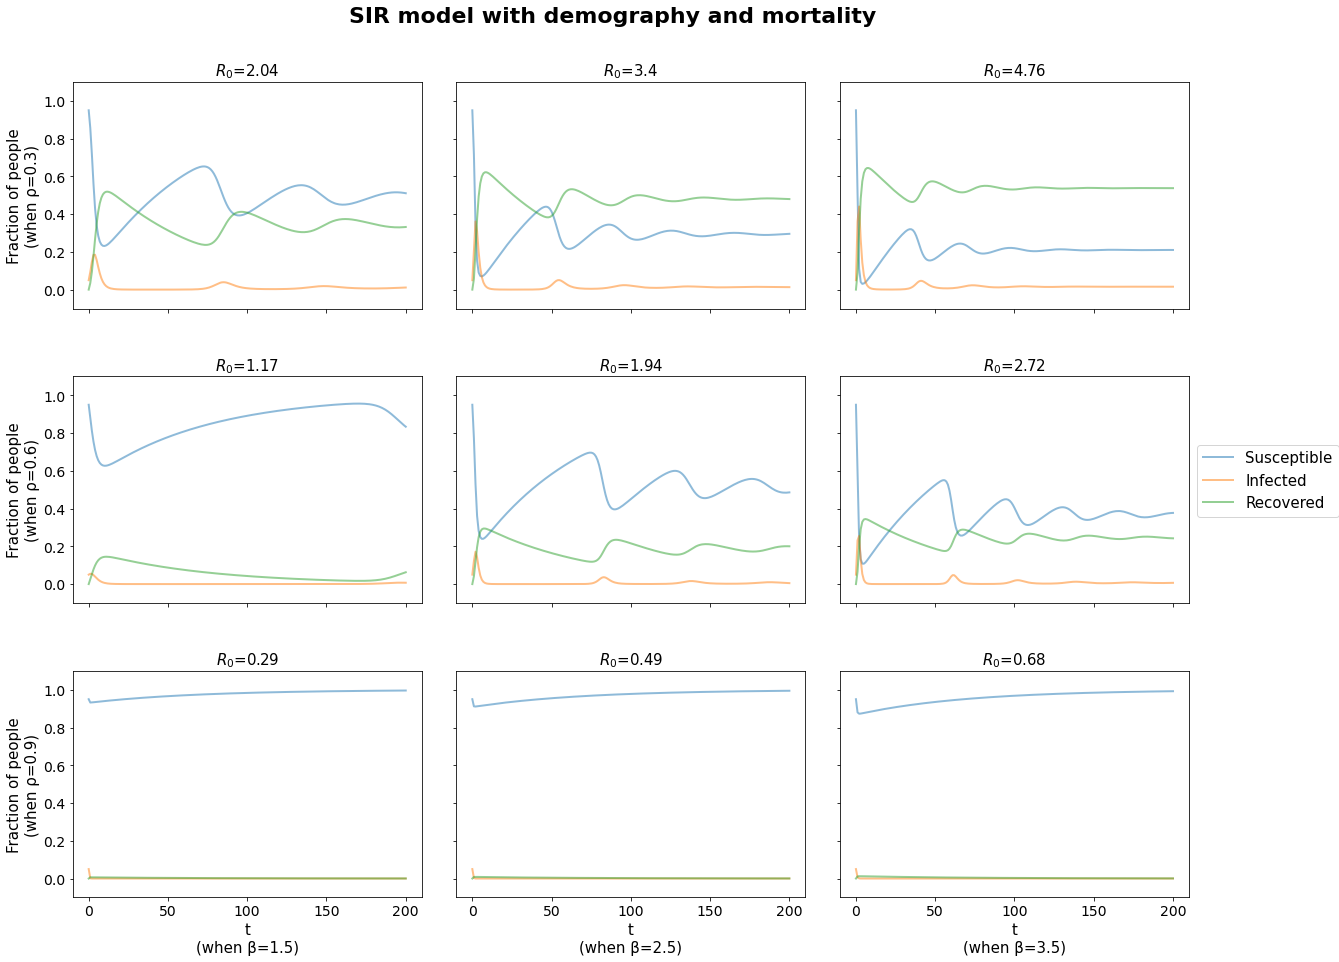

In [12]:
# Set the initial values
S0=0.95
I0=1-S0
R0_r=1-S0-I0
beta=[1.5,2.5,3.5]
gamma=0.5
mu=1/70
rho=[0.3,0.6,0.9]
t=np.linspace(0,200,201)

# Build SIR model with mortality
def SIR_demography_mortality(y,t,beta,gamma,mu,rho):
    S,I,R=y
    dSdt=mu-beta*S*I-mu*S
    dIdt=beta*S*I-(mu+gamma)*I/(1-rho)
    dRdt=gamma*I-mu*R
    return [dSdt,dIdt,dRdt]

# Plot all combinations of beta and mu into the model
fig,ax=plt.subplots(nrows=len(rho),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(rho)):
    for j in range(len(beta)):
        result=odeint(SIR_demography_mortality,[S0,I0,R0_r],t,args=(beta[j],gamma,mu,rho[i]))
        R0=beta[j]*(1-rho[i])/(gamma+mu)
        ax[i,j].figsize=(3,3)
        ax[i,j].plot(t,result,alpha=0.5,lw=2) 
        ax[i,j].set_ylim((-0.1,1.1)) 
        ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=15)
        ax[2,j].set_xlabel('t'+'\n(when '+ chr(946)+'='+str(beta[j])+')',fontsize=15)
        ax[i,0].set_ylabel('Fraction of people'+'\n(when '+chr(961)+'='+str(round(rho[i],4))+')',fontsize=15)
        ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.3,wspace=0.1)
fig.legend(labels=['Susceptible','Infected','Recovered'],loc="right",borderaxespad=0.05,fontsize=15)
fig.suptitle('SIR model with demography and mortality',y=0.95,weight='bold',fontsize=22)
plt.savefig('SIR_d_m1.jpg',dpi=150)

<br><br> <font size=3>
Analyse the change of I respect to $\rho$
<br>

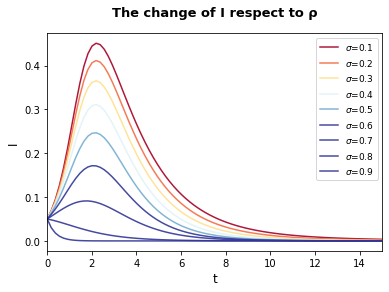

In [13]:
# Set the initial values
S0=0.95
I0=1-S0
R0_r=0
beta=2.5
gamma=0.5
mu=1/70
rho=np.linspace(0.1,0.9,9)
t=np.linspace(0,365,2000)

# Build SIR model with mortality
def SIR_demography_mortality(y,t,beta,gamma,mu,rho):
    S,I,R=y
    dSdt=mu-beta*S*I-mu*S
    dIdt=beta*S*I-(mu+gamma)*I/(1-rho)
    dRdt=gamma*I-mu*R
    return [dSdt,dIdt,dRdt]

# Adjust the line color
def  Color_Normalization(x,inp_list):
    x=x/np.average(inp_list);
    return x/10;

# Draw the image
for i in range(len(rho)):
    result=odeint(SIR_demography_mortality,[S0,I0,R0_r],t,args=(beta,gamma,mu,rho[i])).T  
    plt.plot(t,result[1],alpha=0.9,label='$\sigma$='+str(round(rho[i],2)),color=plt.cm.RdYlBu(Color_Normalization(i,rho)))
    plt.title('The change of I respect to '+chr(961),y=1.05,weight='bold',fontsize=13)
    plt.xlim(0,15)
    plt.xlabel('t',fontsize=12)
    plt.ylabel('I',fontsize=12)
    plt.legend(fontsize=9)
plt.savefig('SIR_d_m2.jpg',dpi=150)

<!-- <br><br> <font size=3>Create phase space diagrams 
<br> -->

In [517]:
# # Set the initial values
# S0_list=np.linspace(0.1,1,10)
# beta=[1.5,2.5,3.5]
# gamma=0.5
# mu=1/70
# rho=[0.3,0.6,0.9]
# t=np.linspace(0,50,1000)

# # Dots indicate the initial condition. On horizontal line we have I(0) = 0.001,
# fig,ax=plt.subplots(nrows=len(rho),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
# for i in range(len(rho)):
#     for j in range(len(beta)):
        
#             for k in S0_list:              # Plot the change of I with S0   
#                 S0=k       
#                 I0=1-S0
#                 R0_r=0
#                 R0=beta[j]/(gamma+mu)
#                 result=odeint(SIR_demography_mortality,[S0,I0,R0_r],t,args=(beta[j],gamma,mu,rho[i])).T    
#                 ax[i,j].plot(result[0],result[1],'blue',alpha=0.5,lw=2) 
#                 ax[i,j].plot(S0,1-S0,'b-')  
#                 ax[i,j].scatter(S0,1-S0,c='blue')
#                 ax[i,j].plot([0,1],[1,0],'gray',alpha=0.3)
#                 ax[i,j].plot([0,1],[0,0],'gray',alpha=0.3)
#                 ax[i,j].plot([1/R0,1/R0],[0,1-1/R0],'p--',alpha=0.3)
                
#                 if (S0>(1/R0+0.4))&(R0>1):       # hot the change of I with S0, when I0=0.001
#                     I0=0.001        
#                     R0_r=1-I0-S0
#                     result=odeint(SIR_demography_mortality,[S0,I0,R0_r],t,args=(beta[j],gamma,mu,rho[i])).T
#                     ax[i,j].plot(result[0],result[1],'blue',alpha=0.5,lw=2) 
#                     ax[i,j].scatter(S0,I0,c='blue')               
#                     ax[i,j].text(1/R0,1.05-1/R0,'1/$R_0$',c='gray',fontsize=13)
        
#             ax[i,j].figsize=(3,3)     
#             ax[i,j].set_xlim(-0.05,1.05)
#             ax[i,j].set_ylim(-0.05,1.05)
#             ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=15)
#             ax[2,j].set_xlabel('S',fontsize=15)     
#             ax[i,0].set_ylabel('I'+'\n(when '+chr(961)+'='+str(rho[i])+')',fontsize=15)
#             ax[i,j].tick_params(labelsize=14)
# plt.subplots_adjust(hspace=0.2,wspace=0.1)
# fig.suptitle('Phase space diagrams of SIR with demography and mortality',y=0.95,weight='bold',fontsize=21)
# plt.savefig('/Users/wind/Documents/荷兰/UVA/intro_cls/assignment1/'+'SIR_d_m3.jpg',dpi=150)

<br><br><br><font size=4> **Problem 3:** Explore SEIR model </font>
<br><br> <font size=3>
<br>This part puts the exposed period into consideration. There are four stages during the whole process: (1) susceptible (2) exposed (3) infected (4) recovered.
<br>

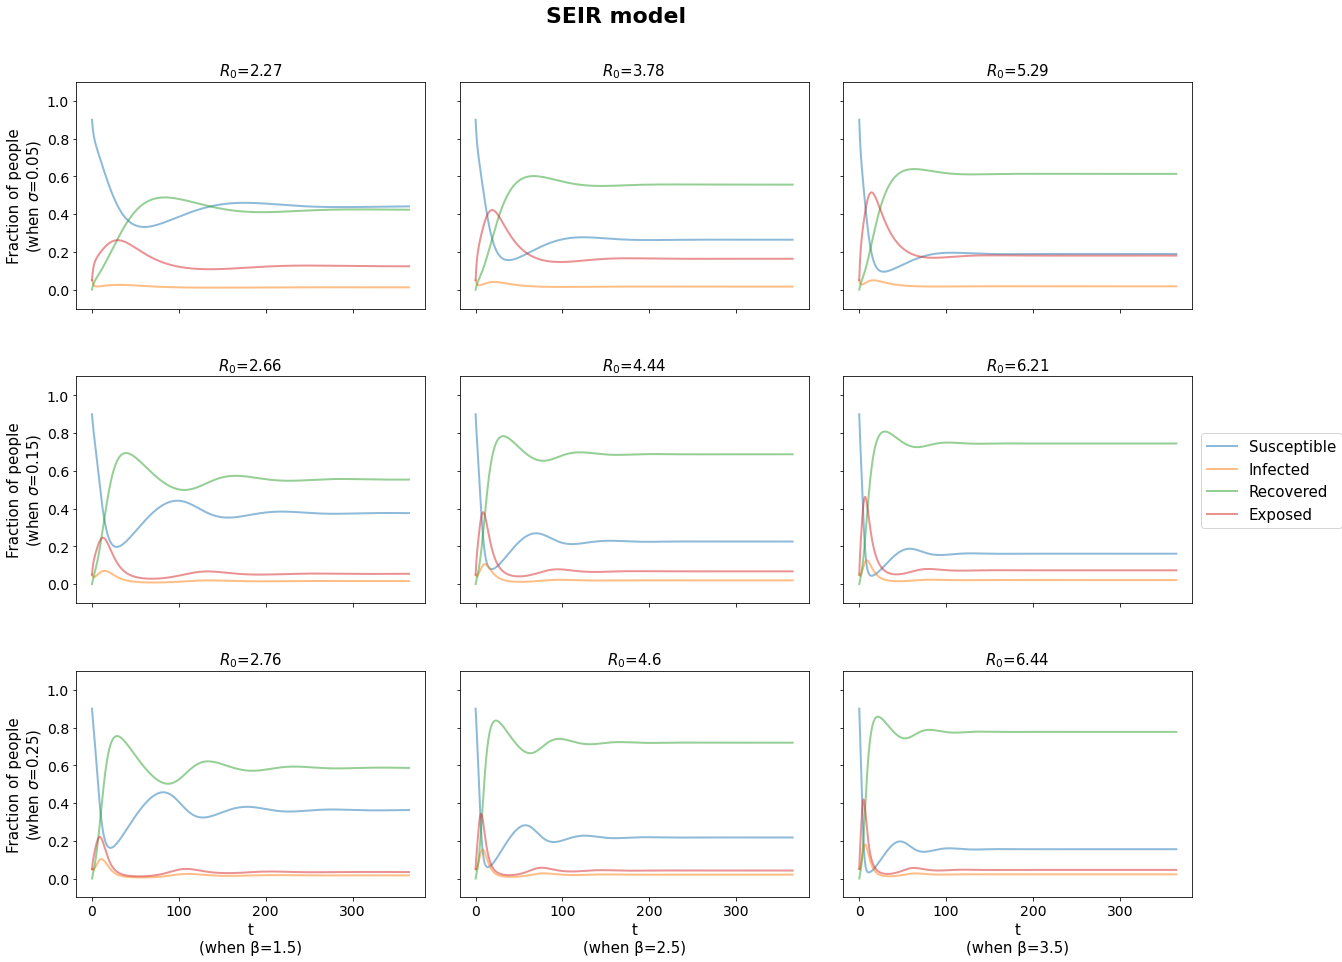

In [14]:
# Build the SEIR 
def SEIR(y,t,beta,gamma,mu,sigma):
    S,I,R,E=y
    dSdt=mu-beta*S*I-mu*S
    dIdt=sigma*E-(mu+gamma)*I
    dRdt=gamma*I-mu*R
    dEdt=beta*S*I-(mu+sigma)*E
    return [dSdt,dIdt,dRdt,dEdt]

# Set the initial values
S0=0.9
E0=0.05
I0=0.05
R0_r=0
beta=[1.5,2.5,3.5]
gamma=0.5
mu=1/70
sigma=[0.05,0.15,0.25]
t=np.linspace(0,365,2000)

# Plot all combinations into the model
fig,ax=plt.subplots(nrows=len(sigma),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(sigma)):
    for j in range(len(beta)):
        result=odeint(SEIR,[S0,I0,R0_r,E0],t,args=(beta[j],gamma,mu,sigma[i]))
        R0=beta[j]*sigma[i]/(gamma+mu)/(mu+sigma[i])
        ax[i,j].figsize=(3,3)
        ax[i,j].plot(t,result,alpha=0.5,lw=2) 
        ax[i,j].set_ylim((-0.1,1.1))
        ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=15)
        ax[2,j].set_xlabel('t'+'\n(when '+ chr(946)+'='+str(beta[j])+')',fontsize=15)
        ax[i,0].set_ylabel('Fraction of people'+'\n(when '+ '$\sigma$'+'='+str(round(sigma[i],4))+')',fontsize=15)
        ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.3,wspace=0.1)
fig.legend(labels=['Susceptible','Infected','Recovered','Exposed'],loc="right",borderaxespad=0.05,fontsize=15)
fig.suptitle('SEIR model',y=0.95,weight='bold',fontsize=22)
plt.savefig('SEIR1.jpg',dpi=150)

<br><br> <font size=3>Analyse the change of I respect to $\sigma$
<br>

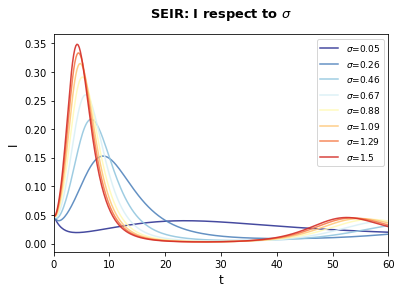

In [15]:
# Set the initial values
S0=0.95
E0=0
I0=1-S0
R0_r=0
beta=2.5
gamma=0.5
mu=1/70
sigma=np.linspace(0.05,1.5,8)
t=np.linspace(0,400,2000)

# Adjust the line color
def  Color_Normalization(x,inp_list):
    x=x/np.average(inp_list);
    return 1-x/10;

# Draw the image
for i in range(len(sigma)):
    result=odeint(SEIR,[S0,I0,R0_r,E0],t,args=(beta,gamma,mu,sigma[i])).T   
    plt.plot(t,result[1],alpha=0.9,label='$\sigma$='+str(round(sigma[i],2)),color=plt.cm.RdYlBu(Color_Normalization(i,sigma)))
    plt.title('SEIR: I respect to $\sigma$',y=1.05,weight='bold',fontsize=13)
    plt.xlim(0,60)
    plt.xlabel('t',fontsize=12)
    plt.ylabel('I',fontsize=12)
    plt.legend(fontsize=9)
plt.savefig('SEIR2.jpg',dpi=150)    

<br><br> <font size=3>hase space diagrams 
<br>

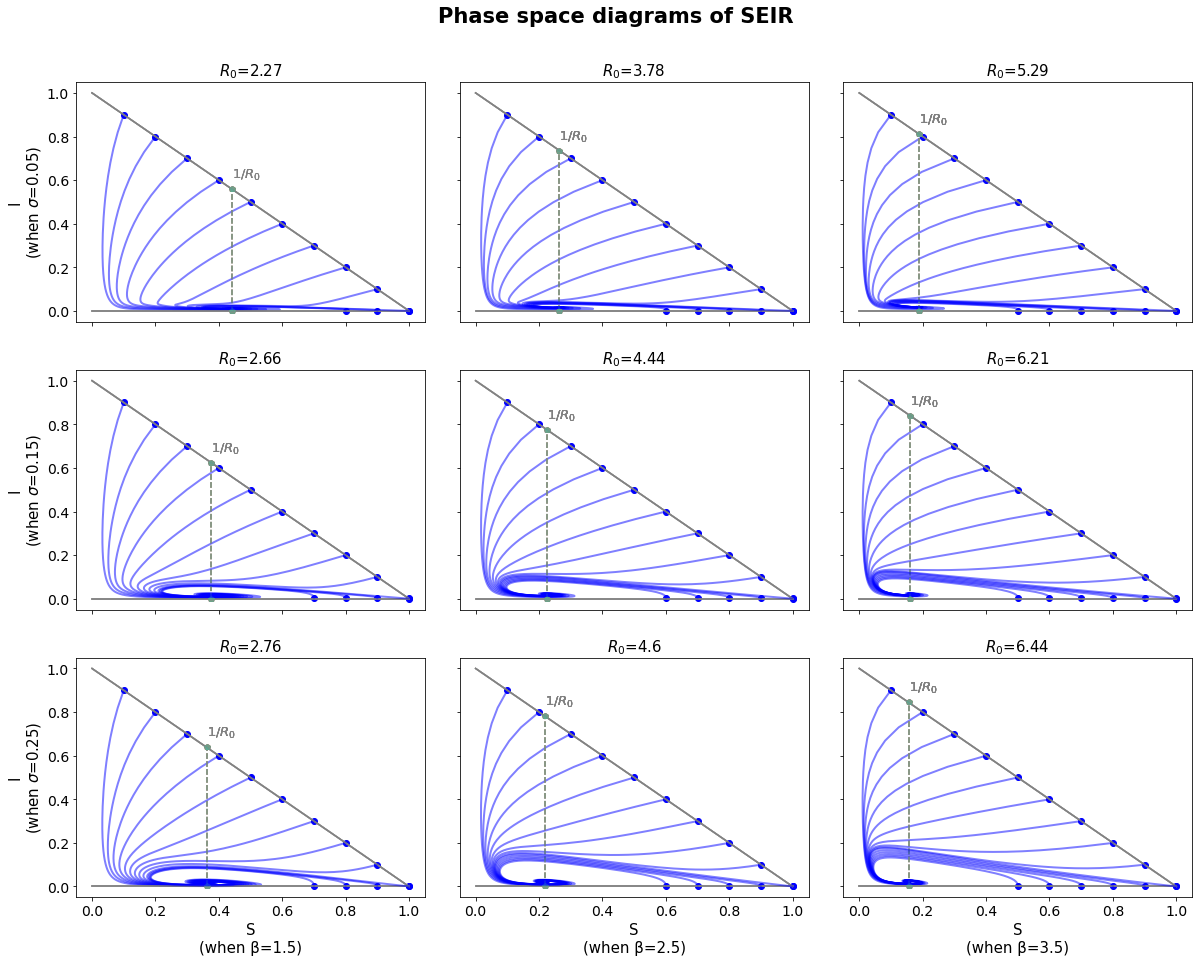

In [16]:
# Set the initial values
S0_list=np.linspace(0.1,1,10)
beta=[1.5,2.5,3.5]
gamma=0.5
mu=1/70
sigma=[0.05,0.15,0.25]
t=np.linspace(0,365,2000)


# Draw the image
fig,ax=plt.subplots(nrows=len(sigma),ncols=len(beta),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(sigma)):
    for j in range(len(beta)):

            for k in S0_list:                    # Plot the change of I with S0  
                S0=k       
                I0=1-S0
                R0_r=0
                E0=0
                R0=beta[j]*sigma[i]/(gamma+mu)/(mu+sigma[i])
                result=odeint(SEIR,[S0,I0,R0_r,E0],t,args=(beta[j],gamma,mu,sigma[i])).T    
                ax[i,j].plot(result[0],result[1],'blue',alpha=0.5,lw=2) 
                ax[i,j].plot(S0,1-S0,'b-')  
                ax[i,j].scatter(S0,1-S0,c='blue')
                ax[i,j].plot([0,1],[1,0],'gray',alpha=0.3)
                ax[i,j].plot([0,1],[0,0],'gray',alpha=0.3)
                ax[i,j].plot([1/R0,1/R0],[0,1-1/R0],'p--',alpha=0.3)
                
                if (S0>(1/R0+0.3))&(R0>1):       # Plot the change of I with S0, when I0=0.001
                    I0=0.001 
                    R0_r=(1-S0-I0)/2
                    E0=(1-S0-I0)/2
                    result=odeint(SEIR,[S0,I0,R0_r,E0],t,args=(beta[j],gamma,mu,sigma[i])).T
                    ax[i,j].plot(result[0],result[1],'blue',alpha=0.5,lw=2) 
                    ax[i,j].scatter(S0,I0,c='blue')               
                    ax[i,j].text(1/R0,1.05-1/R0,'1/$R_0$',c='gray',fontsize=13)
        
            ax[i,j].figsize=(3,3)     
            ax[i,j].set_xlim(-0.05,1.05)
            ax[i,j].set_ylim(-0.05,1.05)
            ax[i,j].set_title('$R_0$='+str(round(R0,2)),fontsize=15)   
            ax[2,j].set_xlabel('S'+'\n(when '+ chr(946)+'='+str(beta[j])+')',fontsize=15)
            ax[i,0].set_ylabel('I'+'\n(when '+'$\sigma$'+'='+str(sigma[i])+')',fontsize=15)
            ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.2,wspace=0.1)
fig.suptitle('Phase space diagrams of SEIR',y=0.95,weight='bold',fontsize=21)
plt.savefig('SEIR3.jpg',dpi=150)


SEIR phase space diagrams

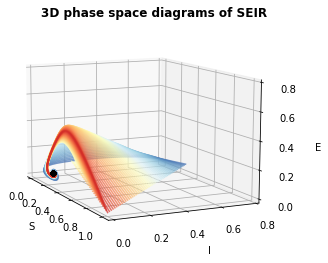

In [17]:
# Set the initial values
beta=2.5
gamma=0.5
mu=1/70
sigma=0.15
t=np.linspace(0,365,1000)
R0=beta*sigma/(gamma+mu)/(mu+sigma)
S0_list=np.linspace(0.1,1,50)

# Get the fixed point
S_fix=1/R0
E_fix=mu*(gamma+mu)*(R0-1)/(beta*sigma)
I_fix=mu*(R0-1)/beta

# Adjust the line color
def  Color_Normalization(x,inp_list):
    x=x/np.average(inp_list);
    return (1-x/2);

# Plot 3D phase space diagrams
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.view_init(10,-25)     # Set the viewing angle
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('E') 
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.3, 1, 1, 0.9]))  # Adjust the size

for i in S0_list:
    S0=i
    I0=1-S0
    R0_r=0
    E0=0
    result=odeint(SEIR,[S0,I0,R0_r,E0],t,args=(beta,gamma,mu,sigma)).T
    S,I,E=result[0],result[1],result[3]
    ax.plot(S,I,E,alpha=0.7,color=plt.cm.RdYlBu(Color_Normalization(i,S0_list)))
    ax.scatter(S_fix,I_fix,E_fix,c='black', marker='o')
    
    if (S0>(1/R0+0.3))&(R0>1):      
        I0=0.001
        R0_r=(1-S0-I0)/2
        E0=(1-S0-I0)/2
        result=odeint(SEIR,[S0,I0,R0_r,E0],t,args=(beta,gamma,mu,sigma)).T
        S,I,E=result[0],result[1],result[3]
        ax.plot(S,I,E,alpha=0.7,color=plt.cm.RdYlBu(Color_Normalization(i,S0_list)))

# for i in S0_list:
#     S0=i
#     I0=0
#     R0_r=0
#     E0=1-S0
#     result=odeint(SEIR,[S0,I0,R0_r,E0],t,args=(beta,gamma,mu,sigma)).T
#     S=result[0]
#     I=result[1]
#     E=result[3]
#     ax.plot(S,I,E,alpha=0.7,color=plt.cm.RdYlBu(Color_Normalization(i,S0_list)))
   
#     if (S0>(1/R0+0.3))&(R0>1):      
#         I0=0
#         R0_r=0
#         E0=1-S0
#         result=odeint(SEIR,[S0,I0,R0_r,E0],t,args=(beta,gamma,mu,sigma)).T
#         S=result[0]
#         I=result[1]
#         E=result[3]
#         ax.plot(S, I,E,alpha=0.7,color=plt.cm.RdYlBu(Color_Normalization(i,S0_list)))
      
ax.set_ylim(-0.01,0.8)
ax.set_zlim(-0.01,0.8)
fig.suptitle('3D phase space diagrams of SEIR',x=0.6,y=0.95,weight='bold')
plt.savefig('SEIR_3D.jpg',dpi=150)

<br><br> <font size=3> Put seasonal effects into the SEIR model
<br>

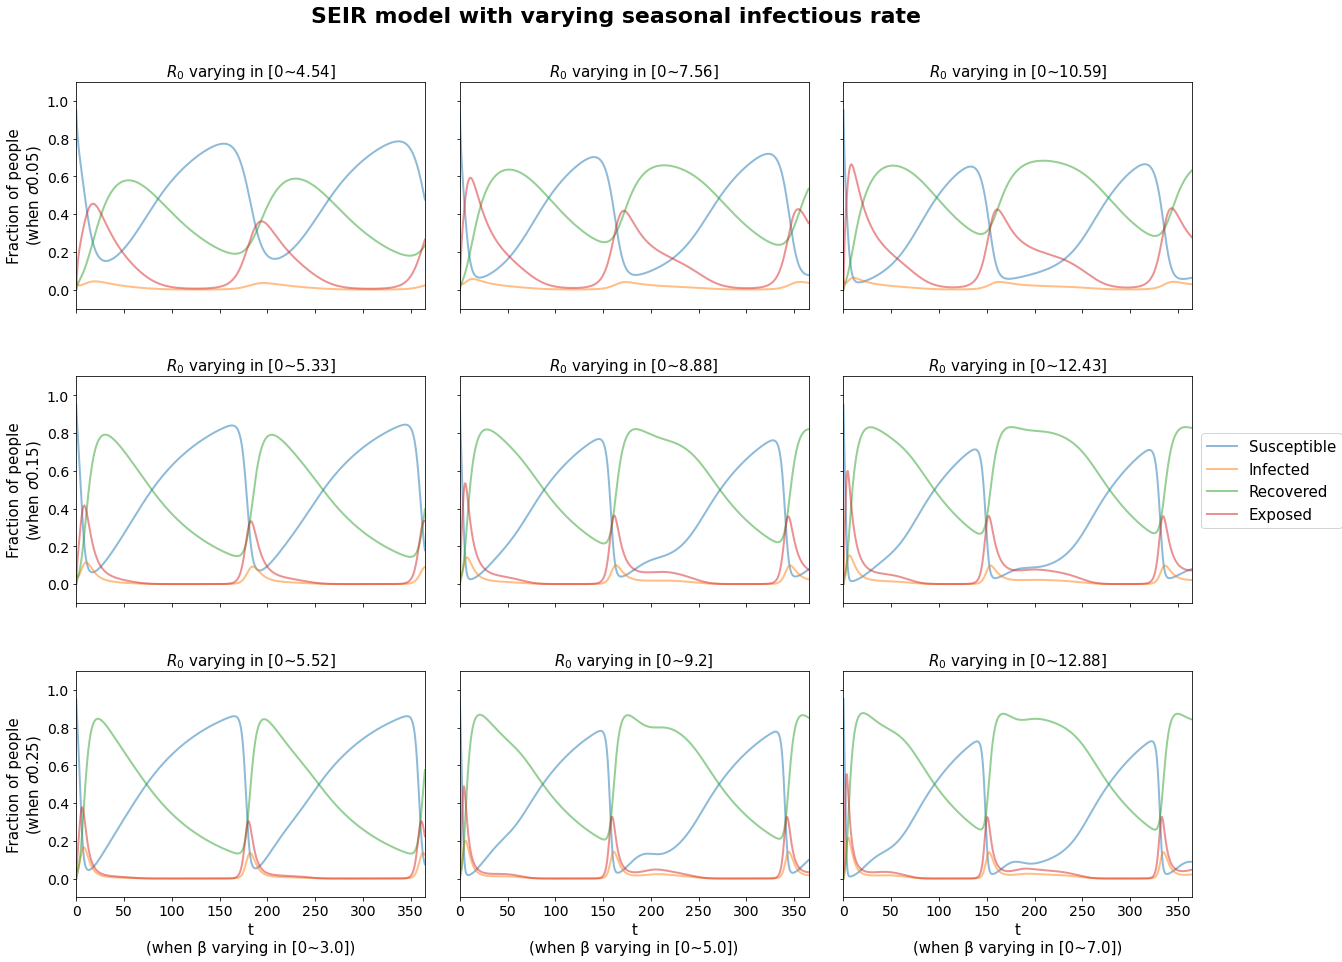

In [18]:
# Design a varying sinusoidal function
def beta_s(t,beta_0):
    w=2*np.pi/365*2
    beta_new=beta_0*(1+math.cos(w*t))  
    return beta_new

# Build the SEIR model with changing season
def SEIR_season(y,t,beta,gamma,mu,sigma):
    S,I,R,E=y
    dSdt=mu-beta_s(t,beta)*S*I-mu*S
    dIdt=sigma*E-(mu+gamma)*I
    dRdt=gamma*I-mu*R
    dEdt=beta_s(t,beta)*S*I-(mu+sigma)*E
    return [dSdt,dIdt,dRdt,dEdt]

# Set the initial values
S0=0.95
E0=0
I0=1-S0
R0_r=0
beta_0=[1.5,2.5,3.5]
gamma=0.5
mu=1/70
sigma=[0.05,0.15,0.25]
t=np.linspace(0,365,2000)

# Plot all combinations into the model
fig,ax=plt.subplots(nrows=len(sigma),ncols=len(beta_0),sharex=True,sharey=True,figsize=(20,15))
for i in range(len(sigma)):
    for j in range(len(beta_0)):
        result=odeint(SEIR_season,[S0,I0,R0_r,E0],t,args=(beta_0[j],gamma,mu,sigma[i]))
        R0=beta_0[j]*sigma[i]/(gamma+mu)/(mu+sigma[i])
        ax[i,j].figsize=(3,3)
        ax[i,j].plot(t,result,alpha=0.5,lw=2) 
        ax[i,j].set_xlim((-0.1,365))
        ax[i,j].set_ylim((-0.1,1.1))
        ax[i,j].set_title('$R_0$'+' varying in '+'[0~'+str(round(2*R0,2))+']',fontsize=15)
        ax[2,j].set_xlabel('t'+'\n(when '+ chr(946)+' varying in '+'[0~'+str(2*beta_0[j])+']'+')',fontsize=15)
        ax[i,0].set_ylabel('Fraction of people'+'\n(when '+ '$\sigma$'+str(round(sigma[i],4))+')',fontsize=15)
        ax[i,j].tick_params(labelsize=14)
plt.subplots_adjust(hspace=0.3,wspace=0.1)
fig.legend(labels=['Susceptible','Infected','Recovered','Exposed'],loc="right",borderaxespad=0.05,fontsize=15)
fig.suptitle('SEIR model with varying seasonal infectious rate',y=0.95,weight='bold',fontsize=22)
plt.savefig('SEIR4.jpg',dpi=150)